# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Show table width
pd.set_option('display.max_colwidth', None) # Show full content of each column
pd.set_option('display.max_rows', None)

In [3]:
TeamID = 6
np.random.seed(TeamID)

# 1. Exploratory Data Analysis - EDA

## 1.1 Data Structure

### Import data

In [4]:
df = pd.read_csv('t06_data.csv')

In [5]:
df.head()

,original_ID,name,store,food category,brand,f_FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Calcium,Iron,Sodium,Cholesterol,"Fatty acids, total saturated"
0,wm_43236028,Petite Carrots,Walmart,produce-beans-wf,Produce Unbranded,0,1.88,0.013429,340.194000,1.175800,0.000000,12.228317,5.878998,2.351599,0.030571,0.000423,0.064199,0.000000,0.000000
1,tg_81910537,Dill-licious Salad Bowl - 5.75oz - Good &#38; Gather&#8482;,Target,produce-packaged,Good & Gather,3,3.49,0.010575,163.009625,9.815951,15.337423,4.785276,2.453988,0.613497,0.079755,0.000663,0.515337,0.030675,4.294479
2,wm_909761483,"Zatarain's Cheddar Jalapeno Cornbread Mix, 12.5 oz",Walmart,baking,Zatarain's,3,1.97,0.001516,354.368750,6.666667,0.000000,98.333333,30.000000,0.000000,0.000000,0.003600,0.760000,0.000000,0.000000
3,wf_icelandic-provisions-coconut-with-almonds-skyr-yogurt-44-oz-b089n69zkg,"Coconut With Almonds Skyr Yogurt, 4.4 oz",WholeFoods,dairy-yogurt-drink,Icelandic Provisions,3,1.99,0.011056,124.737800,8.818498,7.215134,12.297796,7.215134,0.000000,0.104219,0.000000,0.044894,0.020042,4.008408
4,tg_47981869,Alaska Grains Kodiak Wheat Bread - 24oz,Target,bread,Alaska Grains Baking Company,3,2.99,0.001875,637.863750,0.000000,3.125000,41.718750,3.125000,3.125000,0.071875,0.003125,0.421875,0.000000,0.000000


In [6]:
df.tail()

,original_ID,name,store,food category,brand,f_FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Calcium,Iron,Sodium,Cholesterol,"Fatty acids, total saturated"
16619,wf_365-by-whole-foods-market-organic-yellow-corn-tortilla-rounds-salted-12-oz-b07dwcvn6c,"Organic Yellow Corn Tortilla Rounds Salted, 12 oz",WholeFoods,snacks-chips,365 by Whole Foods Market,3,2.99,0.001661,340.19400,7.054798,28.219193,63.493183,0.0000,7.054798,0.000000,0.001411,0.176370,0.000000,1.763700
16620,wm_13023471,"Great Value Tomato 100% Juice, 64 fl oz",Walmart,drink-juice,Great Value,2,1.94,0.004850,1920.00000,0.833333,0.000000,3.708333,2.5000,0.833333,0.021667,0.000300,0.234500,0.000000,0.000000
16621,wf_365-by-whole-foods-market-organic-shelfstable-lemonade-mango-64-fl-oz-b074h6r5zf,"Organic Shelf-Stable Lemonade, Mango, 64 fl oz",WholeFoods,drink-juice,365 by Whole Foods Market,3,3.29,0.005141,1920.00000,0.000000,0.000000,5.250000,8.7500,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000
16622,wm_10402753,"Hillshire Farm¬Æ Ultra Thin Sliced Smoked Ham Deli Meat, 9 oz",Walmart,meat-packaged,Hillshire Farm,3,3.28,0.012148,255.14550,15.873296,4.409249,1.569693,1.7637,0.000000,0.000000,0.000635,0.742341,0.044092,1.763700
16623,wf_milkman-instant-lowfat-dry-milk-344-oz-b0733p3z93,"Instant Lowfat Dry Milk, 3.44 oz",WholeFoods,milk-milk-substitute,Milkman,0,2.39,0.006257,97.52228,33.333333,5.833333,59.000000,50.0000,0.000000,1.125000,0.000000,0.448500,0.037500,3.333333


In [7]:
df.sample(5)

,original_ID,name,store,food category,brand,f_FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Calcium,Iron,Sodium,Cholesterol,"Fatty acids, total saturated"
5438,tg_13156217,Barilla ProteinPLUS Multigrain Penne Pasta - 14.5oz,Target,pasta-noodles,Barilla,0,2.49,0.001808,411.06775,17.636995,1.763700,40.212349,3.527399,8.818498,0.028219,0.003527,0.00000,0.0,0.000000
8050,wf_larabar-cherry-pie-17-oz-b005p0i55c,"Cherry Pie , 1.7 oz",WholeFoods,snacks-bars,Larabar,3,1.39,0.006922,48.19415,8.333333,16.666667,40.833333,41.666667,8.333333,0.108333,0.001500,0.00000,0.0,1.041667
16619,wf_365-by-whole-foods-market-organic-yellow-corn-tortilla-rounds-salted-12-oz-b07dwcvn6c,"Organic Yellow Corn Tortilla Rounds Salted, 12 oz",WholeFoods,snacks-chips,365 by Whole Foods Market,3,2.99,0.001661,340.19400,7.054798,28.219193,63.493183,0.000000,7.054798,0.000000,0.001411,0.17637,0.0,1.763700
9863,wf_cerebelly-organic-strawberry-beet-smart-bars-42-oz-b08f8l118b,"Organic Strawberry Beet Smart Bars, 4.2 oz",WholeFoods,snacks-bars,Cerebelly,0,4.99,0.011176,119.06790,12.500000,14.583333,58.333333,25.000000,12.500000,0.058333,0.012500,0.07000,0.0,0.000000
13345,wm_11961001,"Ore-Ida Golden Tater Tots Seasoned Shredded Potatoes, 32 oz Bag",Walmart,produce-packaged,Ore-Ida,3,2.96,0.002135,907.18400,2.351599,9.406398,16.461196,1.175800,2.351599,0.000000,0.000423,0.34886,0.0,1.763700


### Data Shape

In [8]:
df.shape

(16624, 19)

### Data Types

In [9]:
df.dtypes

original_ID                      object
name                             object
store                            object
food category                    object
brand                            object
f_FPro_class                      int64
price                           float64
price percal                    float64
package_weight                  float64
Protein                         float64
Total Fat                       float64
Carbohydrate                    float64
Sugars, total                   float64
Fiber, total dietary            float64
Calcium                         float64
Iron                            float64
Sodium                          float64
Cholesterol                     float64
Fatty acids, total saturated    float64
dtype: object

### Attribute Values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16624 entries, 0 to 16623
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   original_ID                   16624 non-null  object 
 1   name                          16624 non-null  object 
 2   store                         16624 non-null  object 
 3   food category                 16624 non-null  object 
 4   brand                         16582 non-null  object 
 5   f_FPro_class                  16624 non-null  int64  
 6   price                         16624 non-null  float64
 7   price percal                  16624 non-null  float64
 8   package_weight                16624 non-null  float64
 9   Protein                       16624 non-null  float64
 10  Total Fat                     16624 non-null  float64
 11  Carbohydrate                  16624 non-null  float64
 12  Sugars, total                 16616 non-null  float64
 13  F

### Missing Values

In [11]:
df.isnull().sum()

original_ID                      0
name                             0
store                            0
food category                    0
brand                           42
f_FPro_class                     0
price                            0
price percal                     0
package_weight                   0
Protein                          0
Total Fat                        0
Carbohydrate                     0
Sugars, total                    8
Fiber, total dietary             8
Calcium                          0
Iron                             0
Sodium                           0
Cholesterol                      0
Fatty acids, total saturated     8
dtype: int64

## 1.2 Target Distribution

In [12]:
df['f_FPro_class'].unique()

array([0, 3, 2, 1])

In [13]:
df['f_FPro_class'].value_counts().sort_index()

f_FPro_class
0     1897
1      331
2     1526
3    12870
Name: count, dtype: int64

## 1.3 Descriptive Statistics

### Summary Statistics

In [14]:
df.describe().transpose().round(3)

,count,mean,std,min,25%,50%,75%,max
f_FPro_class,16624.0,2.526,0.987,0.00,3.000,3.000,3.000,3.000
price,16624.0,4.635,3.725,0.03,2.500,3.790,5.690,72.990
price percal,16624.0,0.029,0.328,0.00,0.003,0.006,0.012,15.072
package_weight,16624.0,462.751,2244.905,1.36,198.446,340.194,479.107,272155.422
Protein,16624.0,8.912,9.138,0.00,3.125,6.977,12.000,294.643
Total Fat,16624.0,13.249,14.784,0.00,1.770,8.549,21.164,266.667
Carbohydrate,16624.0,33.288,31.271,0.00,7.936,26.250,53.400,880.952
"Sugars, total",16616.0,12.412,17.203,0.00,0.962,4.167,18.182,178.947
"Fiber, total dietary",16616.0,3.206,5.058,0.00,0.000,1.667,3.571,125.000
Calcium,16624.0,0.098,0.211,0.00,0.000,0.036,0.114,9.750


### Boxplots

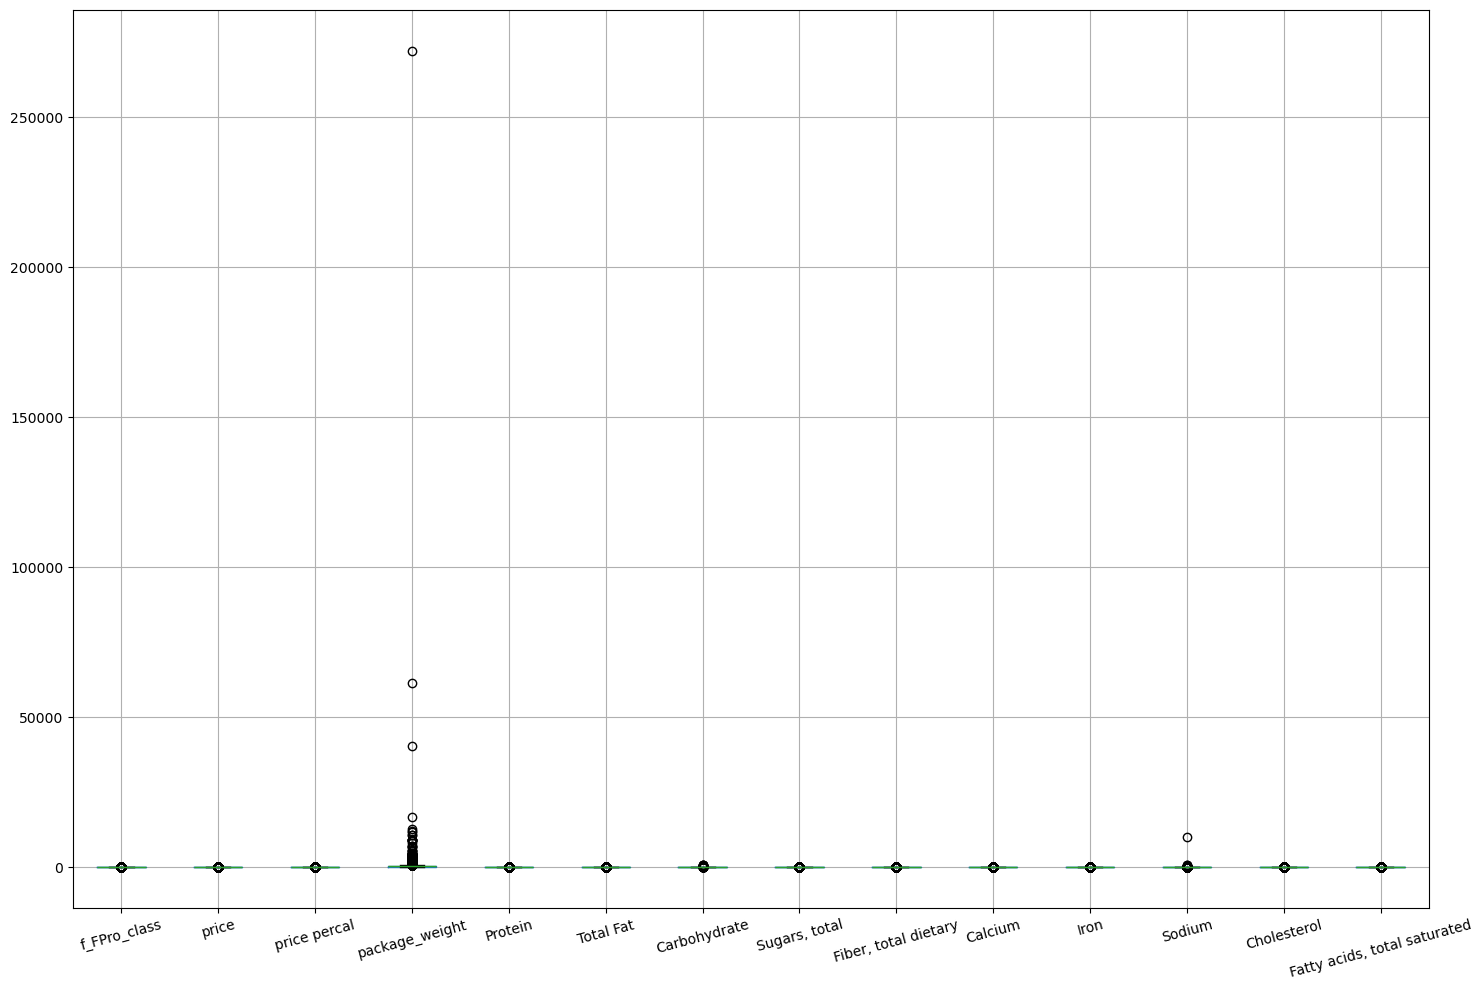

In [15]:
ax = df.boxplot(figsize=(15, 10))

ax.tick_params(axis='x', rotation=15)

plt.tight_layout()

plt.show()

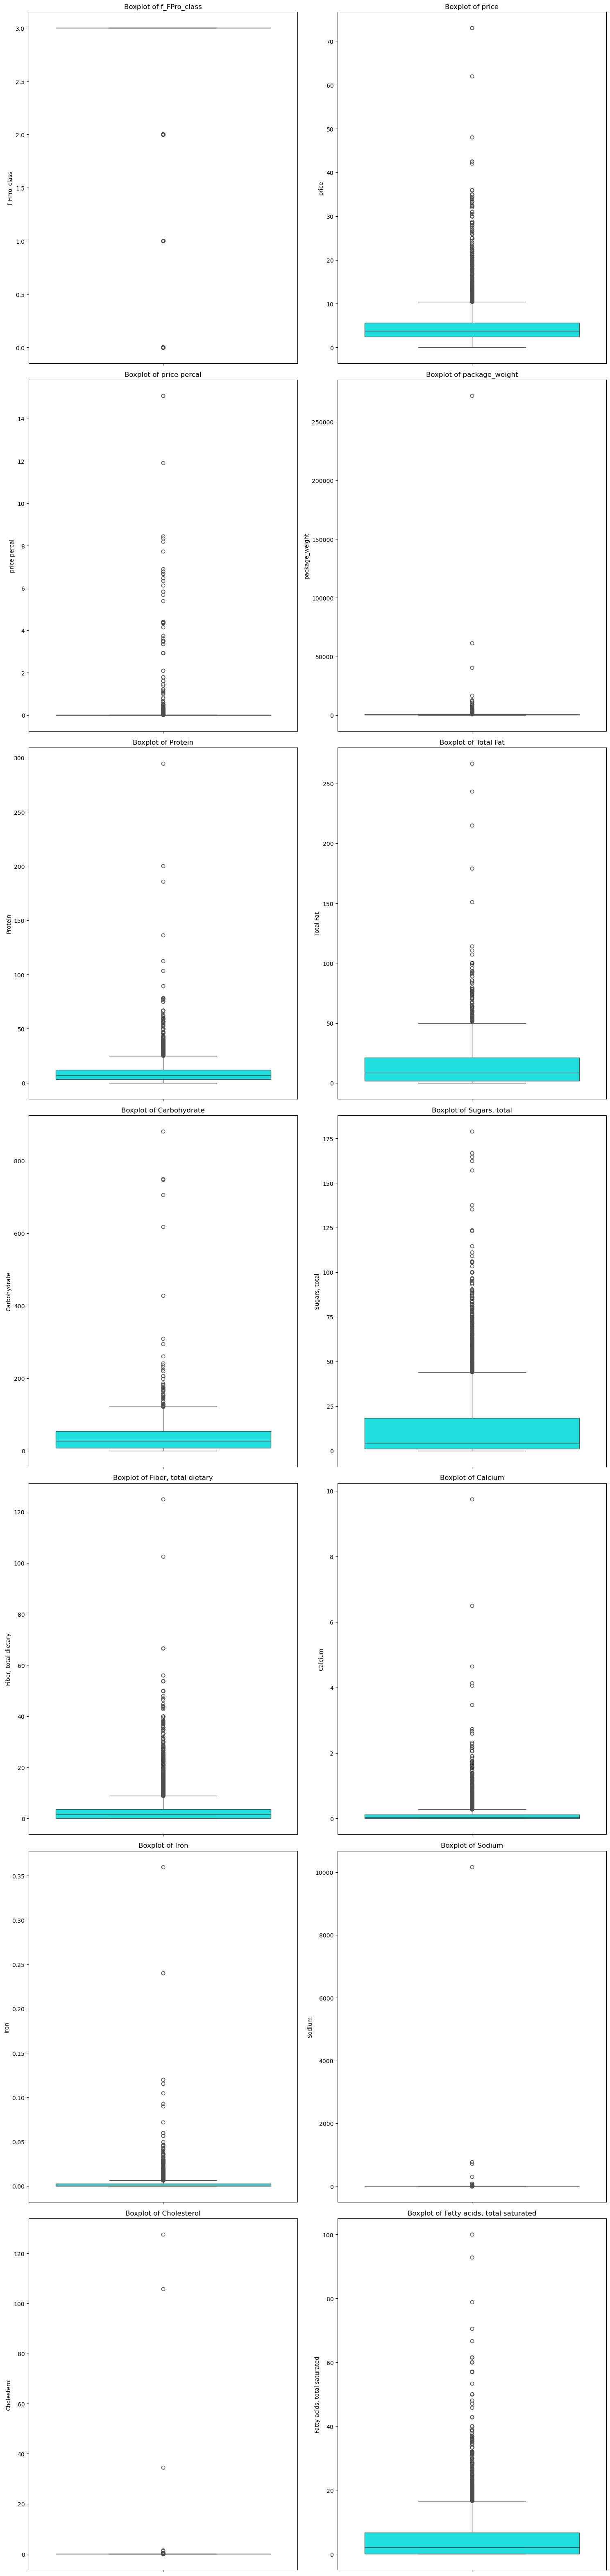

In [16]:
numeric_columns = df.select_dtypes(include=['number']).columns
n_cols = 2
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 9*n_rows))
axes = axes.flatten() if n_rows > 1 else axes

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        sns.boxplot(y=df[col], ax=axes[i], color='cyan')
        axes[i].set_title(f'Boxplot of {col}')

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

=> A lot of outliers

### Histograms

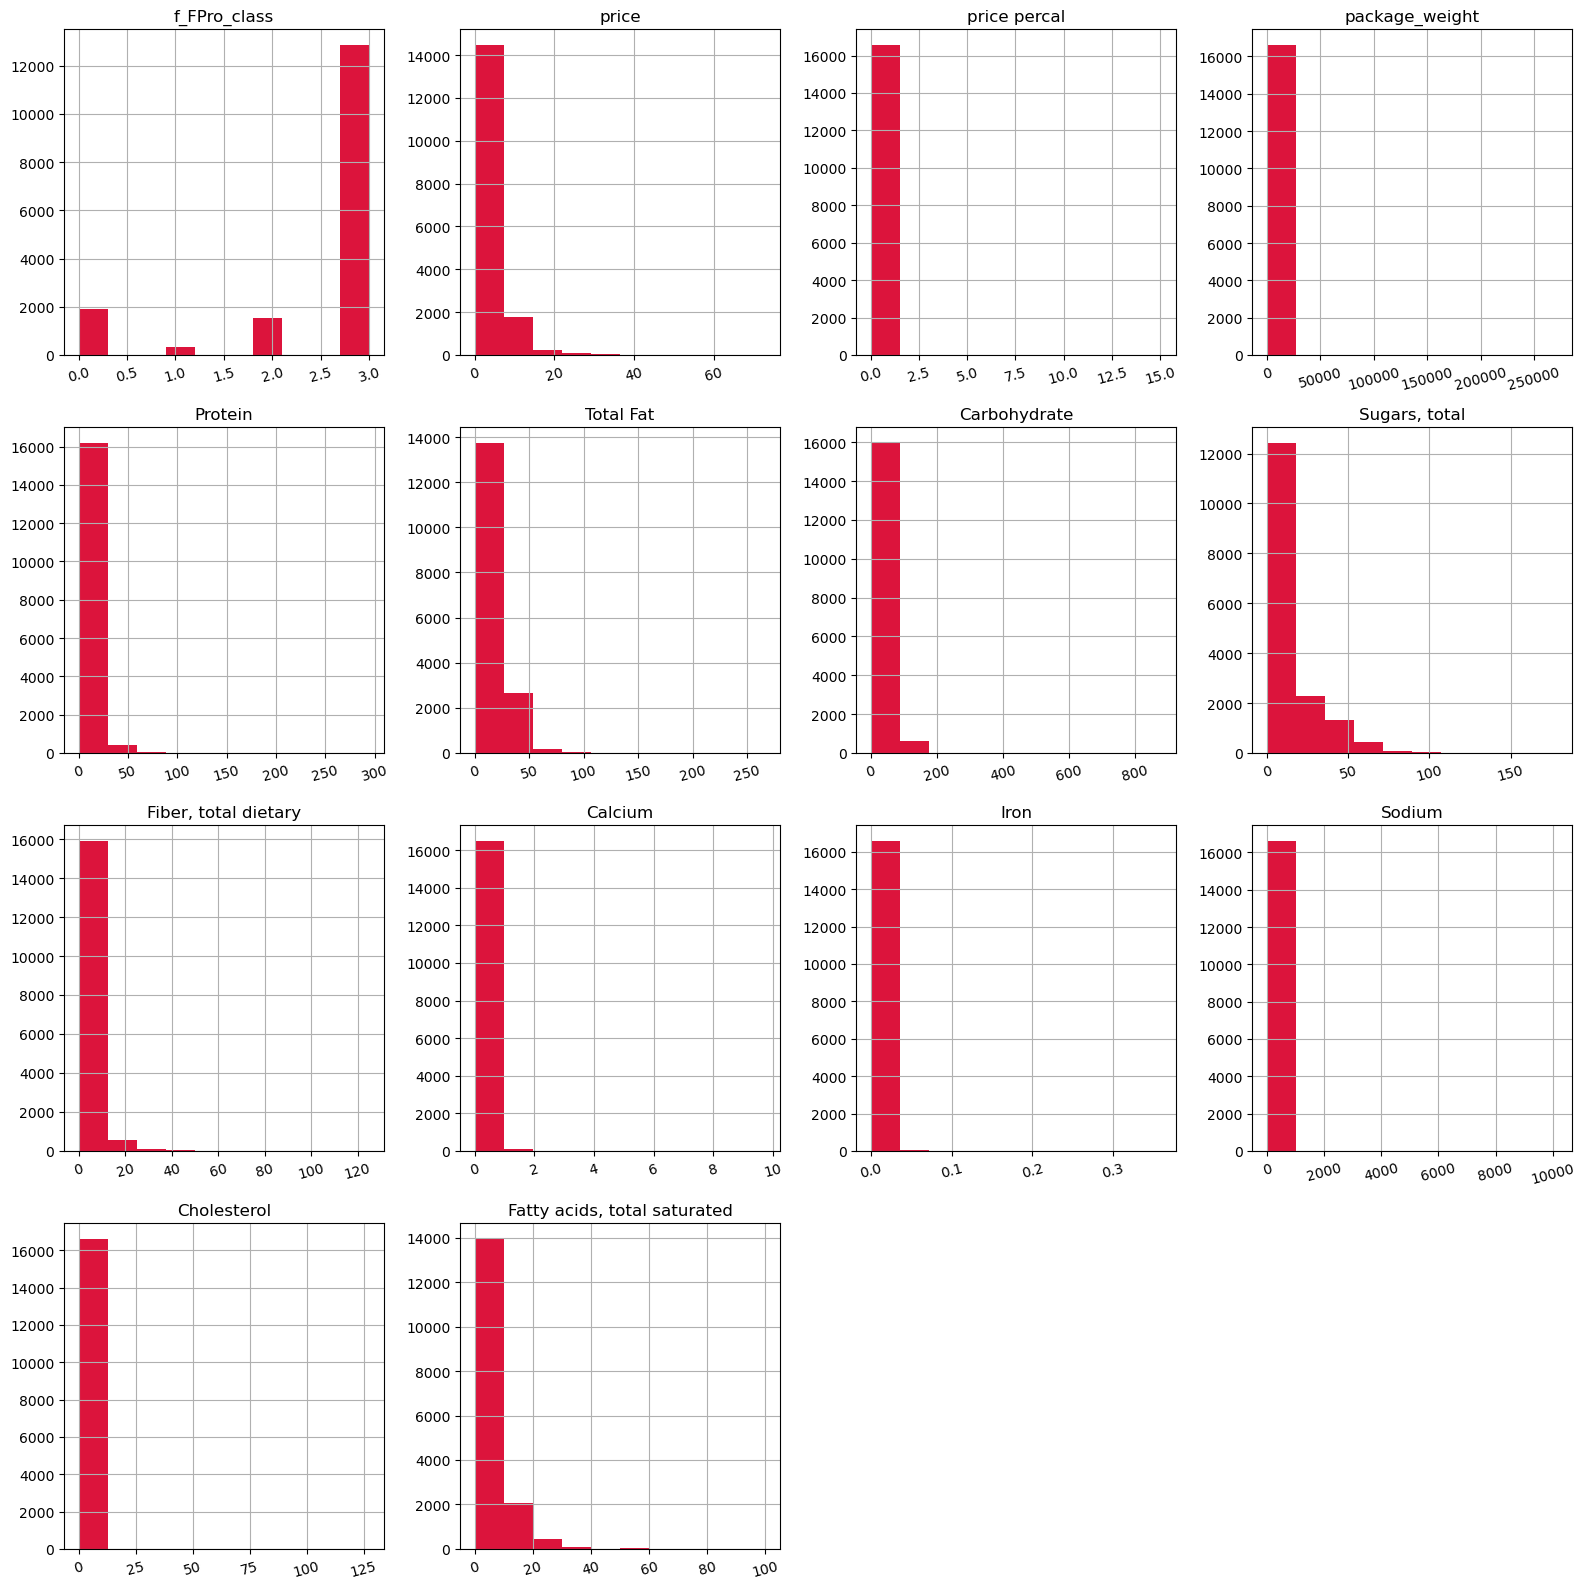

In [17]:
axes = df.hist(figsize=(16, 16), color='crimson')

for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=15)
    
plt.tight_layout()
plt.show()

=> highly skewed data, most variables have small values, from 0 to 10

# 2. Data Preprocessing

## 2.1 Target Construction

### Convert target variable to binary values: 0, 1, 2 -> 1 ; 3 -> 0

In [18]:
df['target'] = np.where(df['f_FPro_class'] == 3, 0, 1)

In [19]:
df.head()

,original_ID,name,store,food category,brand,f_FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Calcium,Iron,Sodium,Cholesterol,"Fatty acids, total saturated",target
0,wm_43236028,Petite Carrots,Walmart,produce-beans-wf,Produce Unbranded,0,1.88,0.013429,340.194000,1.175800,0.000000,12.228317,5.878998,2.351599,0.030571,0.000423,0.064199,0.000000,0.000000,1
1,tg_81910537,Dill-licious Salad Bowl - 5.75oz - Good &#38; Gather&#8482;,Target,produce-packaged,Good & Gather,3,3.49,0.010575,163.009625,9.815951,15.337423,4.785276,2.453988,0.613497,0.079755,0.000663,0.515337,0.030675,4.294479,0
2,wm_909761483,"Zatarain's Cheddar Jalapeno Cornbread Mix, 12.5 oz",Walmart,baking,Zatarain's,3,1.97,0.001516,354.368750,6.666667,0.000000,98.333333,30.000000,0.000000,0.000000,0.003600,0.760000,0.000000,0.000000,0
3,wf_icelandic-provisions-coconut-with-almonds-skyr-yogurt-44-oz-b089n69zkg,"Coconut With Almonds Skyr Yogurt, 4.4 oz",WholeFoods,dairy-yogurt-drink,Icelandic Provisions,3,1.99,0.011056,124.737800,8.818498,7.215134,12.297796,7.215134,0.000000,0.104219,0.000000,0.044894,0.020042,4.008408,0
4,tg_47981869,Alaska Grains Kodiak Wheat Bread - 24oz,Target,bread,Alaska Grains Baking Company,3,2.99,0.001875,637.863750,0.000000,3.125000,41.718750,3.125000,3.125000,0.071875,0.003125,0.421875,0.000000,0.000000,0


## 2.2 Feature Creation & Selection

In [20]:
df['store'].unique()

array(['Walmart', 'Target', 'WholeFoods'], dtype=object)

In [21]:
df['store'].value_counts()

store
Walmart       5948
WholeFoods    5640
Target        5036
Name: count, dtype: int64

In [22]:
df['food category'].unique()

array(['produce-beans-wf', 'produce-packaged', 'baking',
       'dairy-yogurt-drink', 'bread', 'cookies-biscuit',
       'pastry-chocolate-candy', 'cheese', 'rolls-buns-wraps',
       'sauce-all', 'coffee-beans-wf', 'prepared-meals-dishes', 'cereal',
       'sausage-bacon', 'snacks-chips', 'meat-packaged',
       'ice-cream-dessert', 'snacks-bars', 'drink-juice',
       'drink-shakes-other', 'snacks-dips-salsa', 'snacks-nuts-seeds',
       'snacks-mixes-crackers', 'nuts-seeds-wf', 'jerky',
       'rice-grains-wf', 'spread-squeeze', 'dressings', 'pizza',
       'snacks-popcorn', 'breakfast', 'milk-milk-substitute',
       'pasta-noodles', 'drink-coffee', 'meat-poultry-wf', 'seafood',
       'mac-cheese', 'spices-seasoning', 'soup-stew', 'cakes',
       'pudding-jello', 'rice-grains-packaged', 'salad', 'muffins-bagels',
       'culinary-ingredients', 'baby-food', 'drink-tea', 'eggs-wf',
       'drink-soft-energy-mixes'], dtype=object)

In [23]:
df['food category'].value_counts()

food category
prepared-meals-dishes      1279
pastry-chocolate-candy     1053
snacks-bars                 913
cookies-biscuit             779
produce-packaged            770
snacks-mixes-crackers       744
snacks-chips                696
produce-beans-wf            635
cheese                      625
meat-packaged               595
dairy-yogurt-drink          537
cereal                      528
ice-cream-dessert           511
bread                       431
rolls-buns-wraps            416
sauce-all                   408
soup-stew                   394
dressings                   341
seafood                     330
sausage-bacon               316
drink-juice                 310
pizza                       271
cakes                       249
baking                      249
snacks-nuts-seeds           238
snacks-dips-salsa           221
breakfast                   198
milk-milk-substitute        195
spread-squeeze              190
drink-shakes-other          185
jerky                     

In [24]:
df['brand'].unique()

array(['Produce Unbranded', 'Good & Gather', "Zatarain's", ..., 'Millers',
       'Nerds', 'Milkman'], shape=(2398,), dtype=object)

In [25]:
df['brand'].value_counts()

brand
Great Value                                               862
365 by Whole Foods Market                                 730
Good & Gather                                             453
Whole Foods Market                                        299
Pepperidge Farm                                           192
365 Everyday Value¬Æ                                      181
PRODUCE                                                   179
Favorite Day                                              143
Marketside                                                113
Kraft                                                     113
Freshness Guaranteed                                       87
Market Pantry                                              83
Amy's Kitchen                                              80
Larabar                                                    75
Pillsbury                                                  74
Chobani                                                    74
Qu

### Drop unnecessary features: original_ID,	name,	brand,	f_FPro_class

### Handle missing values

### Encode categorical features

### Extract text features

### Normalize features

## 2.3 Handling Class Imbalance

### Oversampling

### Undersampling

### SMOTE

# 3. Classification models

## Baseline Model

## Model Building

### Decision Tree

### Random Forest

## Model Selection & Evaluation

### Data Split

### Random Seed

### Hyperparameter Tuning

## Evaluation metrics

### Accuracy

### Precision

### Recall

### F1 Score

### ROC-AUC

# 4. Outlier Detection

## Clustering

## Elbow Method